##  Prueba Rendimiento Escolar- Hito 4
#### Camila Vera Villa - agosto 12, 2019
#### Objetivo
Completar el punto de Modelación predictiva..
#### Elementos a considerar
* La preparación del ambiente de trabajo (imports, separación de muestras) para
implementar modelos de predicción. (1 punto)
* La implementación de por lo menos tres modelos predictivos. (2 puntos)
* El reporte del mejor modelo predictivo en base a los resultados. (2 puntos)
#### Entregable
* Dos notebooks (uno por enunciado) con todos los puntos detallados e interpretados. De ser necesario, un archivo con extensión .py con todas las funciones implementadas.

### I. Preliminares
Descripción del problema y objetivos, así como explicar cómo implementarán su solución (debe considerar qué criterios de optimización y métricas de desempeño).

* **Descripción del problema**

Se generara un modelo predictivo que identifique el rendimiento de los estudiantes de un colegio portugues,en base al promedio final del ano escolar, basado en registros sociodemograficos, conductuales y ambientales.

* **Objetivos**

Se desarrollara un modelo de regresion lineal, el cual permita identificar como el cambio de ciertas varibales (sociodemograficos, conductuales y ambientales) afecta el valor de otra (desempeno academico), prediciendo el rendimiento de los estudiantes.

* **Metodologia y criterios de optimizacion**

    La metodologia consiste a grandes rasgos en la ingesta de datos, preprocesamiento, visualización y modelación. Lo que corresponde a lo siguiente:    
    
    - Importacion y limpieza dataset
    - Visualizacion de valores perdidos
    - Recodificacion de variables, generacion de dummies 
    - Visualizacion de frecuencias con histogramas: variables continuas
    - Visualizacion de frecuencias con graficos de barras: variables categoricas
    - Generacion diagramas de dispersion (scatter plot)
    - Generacion de pruebas de normalidad y mapas de correlacion
    - Generacion de modelos econometricos con las variables predictoras
    - Depuracion de modelos con las variables estadisticamente significativas(p valor < 0.05)
    - Generacion de nuevo modelo de Machine Learning de regresin logistica
    
* **Metricas y evaluacion de desempeno**

    La evaluación será sobre la base del r2 y error cuadrático medio, mientras más cercano a 1 el r2 mejor será el modelo y mientras menor sea el error cuadrático medio.
    
* **Librerias a utilizar**
    - Para visualzacion de datos, **numpy** y **pandas**
    - Para exploracion y analisis estadistico, **scipy.stats** y **statsmodels**
    - Para graficar, **matplotlib.pyplot** y **seaborn**
    - Para algoritmos de regresion y clasificacion, **sklearn**




### II. Aspectos computacionales
Librerías y módulos a implementar, así como las funciones generadas y su objetivo.

In [1]:
# librerias clasicas para describir
import numpy as np
import pandas as pd
import pandas_profiling

#libreria statmodels para exploracion y analisis estadistico
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

#libreria sklearn, para algoritmos de regresion y clasificacion
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score

from copy import copy
import missingno as msngo


# librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') 
#plt.rcParams["figure.figsize"] = (20, 20) # Tamaño 
#plt.rcParams["figure.dpi"] = 100 # resolución

* **Importacion y limpieza dataset**

In [2]:
#carga dataset
df= pd.read_csv("students.csv", sep = '|', na_values=None)

In [3]:
df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,nulidade,U,GT3,A,4,4,at_home,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,1,GP,F,"""17""",U,GT3,T,1,1,at_home,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,2,GP,F,"""15""",U,LE3,T,1,1,at_home,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,3,GP,F,"""15""",U,GT3,T,4,2,health,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,4,GP,F,sem validade,U,GT3,T,3,3,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


In [4]:
df.dtypes

Unnamed: 0     int64
school        object
sex           object
age           object
address       object
famsize       object
Pstatus       object
Medu          object
Fedu          object
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime    object
studytime     object
failures      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel        object
freetime      object
goout         object
Dalc          object
Walc          object
health        object
absences      object
G1            object
G2             int64
G3            object
dtype: object

In [5]:
# replace
df.replace({'nulidade':np.nan, 'sem validade':np.nan, 'zero': np.nan},
           inplace = True)
    

In [6]:
df.drop('Unnamed: 0',axis =1, inplace = True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,NaN,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


In [7]:
# cambio tipo de dato object a float por columnas 
#df['age'] = df['age'].astype(int)
df['age'] = pd.to_numeric(df['age'].str.strip('"'),errors='coerce')
df['failures'] = pd.to_numeric(df['failures'],errors='coerce')
df['famrel'] = pd.to_numeric(df['famrel'],errors='coerce')
df['freetime'] = pd.to_numeric(df['freetime'],errors='coerce')
df['goout'] = pd.to_numeric(df['goout'].str.strip('"'),errors='coerce')
df['Dalc'] = pd.to_numeric(df['Dalc'],errors='coerce')
df['Walc'] = pd.to_numeric(df['Walc'],errors='coerce')
df['health'] = pd.to_numeric(df['health'].str.strip('"'),errors='coerce')
df['absences'] = pd.to_numeric(df['absences'],errors='coerce')
df['G1'] = pd.to_numeric(df['G1'],errors='coerce')
df['G3'] = pd.to_numeric(df['G3'],errors='coerce')
df.dtypes



school         object
sex            object
age           float64
address        object
famsize        object
Pstatus        object
Medu           object
Fedu           object
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime     object
studytime      object
failures      float64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime      float64
goout         float64
Dalc          float64
Walc          float64
health        float64
absences      float64
G1            float64
G2              int64
G3            float64
dtype: object

In [8]:
df['school'].value_counts()

GP    345
MS     45
Name: school, dtype: int64

### Inspección de datos perdidos en las variables

 * **Visualizacion y recodificacion de valores perdidos**

In [9]:
df.isnull().sum()

school        5
sex           3
age           4
address       2
famsize       4
Pstatus       6
Medu          3
Fedu          5
Mjob          6
Fjob          0
reason        4
guardian      4
traveltime    3
studytime     5
failures      5
schoolsup     8
famsup        5
paid          1
activities    5
nursery       6
higher        6
internet      3
romantic      2
famrel        5
freetime      2
goout         5
Dalc          3
Walc          5
health        4
absences      4
G1            4
G2            0
G3            3
dtype: int64

In [10]:
#limpieza de los valores nulos
df2 = df.dropna()

In [11]:
df2.shape

(284, 33)

In [12]:
print ("Cantidad de registros eliminados:  ", df.shape[0]-df2.shape[0])
print ("Porcentaje de registros eliminados:  ", round(((df.shape[0]-df2.shape[0])/df.shape[0])*100,3), "%" )


Cantidad de registros eliminados:   111
Porcentaje de registros eliminados:   28.101 %


In [13]:
# reemplazo del df
df=df2
df.shape

(284, 33)

### Recodificacion de las  variables 

In [14]:
#reemplazar "-" a los columnas que lo contengan, por "_"
for col_name, col_data in df.iteritems():
    if col_data.dtype == 'object':
        df[col_name] = df[col_name].str.replace('-','_')  # Esto reemplaza los '-' en los registros
    # Esto reemplaza los '-' en los nombres de las columnas
    df.rename(columns = {col_name:col_name.replace('-','_')}, inplace = True) 

In [15]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5,6.0
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14,15.0
5,GP,M,16.0,U,LE3,T,4,3,services,other,...,5.0,4.0,2.0,1.0,2.0,5.0,10.0,15.0,15,15.0
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4.0,4.0,4.0,1.0,1.0,3.0,0.0,12.0,12,11.0
7,GP,F,17.0,U,GT3,A,4,4,other,teacher,...,4.0,1.0,4.0,1.0,1.0,1.0,6.0,6.0,5,6.0


In [16]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### Transformacion a Dummies

In [17]:
df_dummies = pd.get_dummies(df, drop_first = True)

In [18]:
df_dummies.head()

,age,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,...,studytime_3,studytime_4,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
1,17.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,...,0,0,0,1,0,0,0,1,1,0
3,15.0,0.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,...,1,0,0,1,1,1,1,1,1,1
5,16.0,0.0,5.0,4.0,2.0,1.0,2.0,5.0,10.0,15.0,...,0,0,0,1,1,1,1,1,1,0
6,16.0,0.0,4.0,4.0,4.0,1.0,1.0,3.0,0.0,12.0,...,0,0,0,0,0,0,1,1,1,0
7,17.0,0.0,4.0,1.0,4.0,1.0,1.0,1.0,6.0,6.0,...,0,0,1,1,0,0,1,1,0,0


In [19]:
df_dummies.columns

Index(['age', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'school_MS', 'sex_M',
       'address_U', 'famsize_LE3', 'Pstatus_T', 'Medu_1', 'Medu_2', 'Medu_3',
       'Medu_4', 'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'traveltime_2', 'traveltime_3', 'traveltime_4',
       'studytime_2', 'studytime_3', 'studytime_4', 'schoolsup_yes',
       'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes',
       'internet_yes', 'romantic_yes'],
      dtype='object')

In [20]:
# reemplazo del df
df=df_dummies

#### Estadisticas descriptivas de las variables con pandas_profiling

In [21]:
pandas_profiling.ProfileReport(df, correlation_threshold = 1)

Number of variables,53
Number of observations,284
Total Missing (%),0.0%
Total size in memory,40.0 KiB
Average record size in memory,144.3 B
Numeric,13
Categorical,0
Boolean,40
Date,0
Text (Unique),0
Rejected,0


In [22]:
# ciclo para obtener las estadísticas descriptivas

for i in df:
    if len(df[i].value_counts()) > 2:
         print(df[i].describe(), "\n")
    else:
        print(df[i].value_counts('%'), "\n") 

count    284.000000
mean      16.707746
std        1.284238
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64 

count    284.000000
mean       0.334507
std        0.730994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64 

count    284.000000
mean       3.940141
std        0.881659
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64 

count    284.00000
mean       3.18662
std        1.02117
min        1.00000
25%        3.00000
50%        3.00000
75%        4.00000
max        5.00000
Name: freetime, dtype: float64 

count    284.000000
mean       3.084507
std        1.076527
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64 

count    284.000000
mean       1.482394
std        0.

### Inspeccion visual del vector objetivo

In [23]:
df['G1'].describe()

count    284.000000
mean      10.933099
std        3.289199
min        4.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

In [24]:
df['G2'].describe()

count    284.000000
mean      10.640845
std        3.789220
min        0.000000
25%        9.000000
50%       10.500000
75%       13.000000
max       19.000000
Name: G2, dtype: float64

In [25]:
df['G3'].describe()

count    284.000000
mean      10.394366
std        4.565902
min        0.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       20.000000
Name: G3, dtype: float64

In [26]:
# Histogramas y gráficos de frecuencias
def plot_hist(dataframe, variable):
    """funcion para graficar histogramas"""
    
    #prints
    print(f'___________   {variable}   ___________')
    print(f' - La media de la variable {variable} es igual a: {dataframe[variable].mean()}')
    print(f' - La mediana de la variable {variable} es igual a: {dataframe[variable].median()}')
   
    #grafico
    plt.hist(dataframe[variable], alpha=.5, color='darkturquoise', label=variable)
    plt.axvline(dataframe[variable].mean(),lw = 3, color='tomato', label = 'Media')
    plt.axvline(dataframe[variable].median(),lw = 3, color ='gold', label = 'Mediana')
    
    plt.title(f' Histograma variable {variable}')
    plt.legend()
    plt.show   

___________   G1   ___________
 - La media de la variable G1 es igual a: 10.933098591549296
 - La mediana de la variable G1 es igual a: 11.0


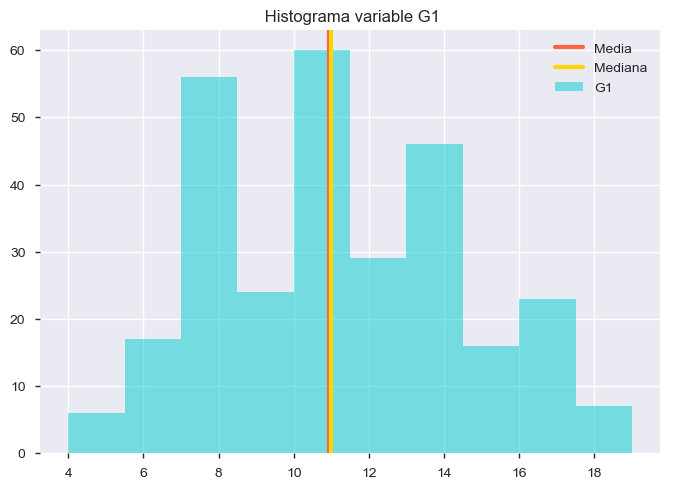

In [27]:
plot_hist(df,'G1')

___________   G2   ___________
 - La media de la variable G2 es igual a: 10.640845070422536
 - La mediana de la variable G2 es igual a: 10.5


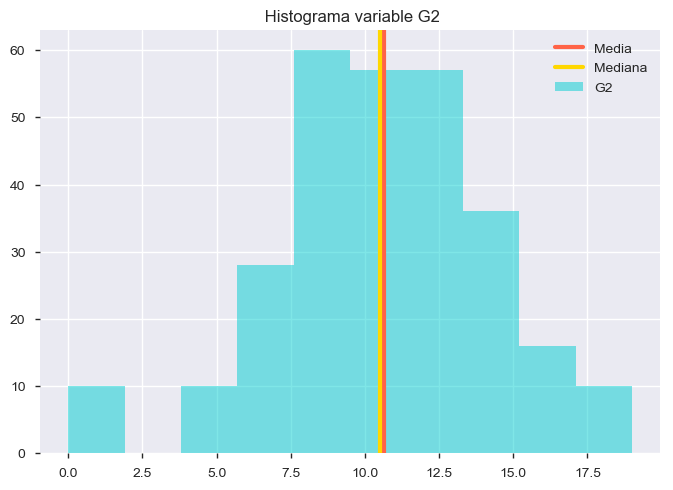

In [28]:
plot_hist(df,'G2')

___________   G3   ___________
 - La media de la variable G3 es igual a: 10.394366197183098
 - La mediana de la variable G3 es igual a: 11.0


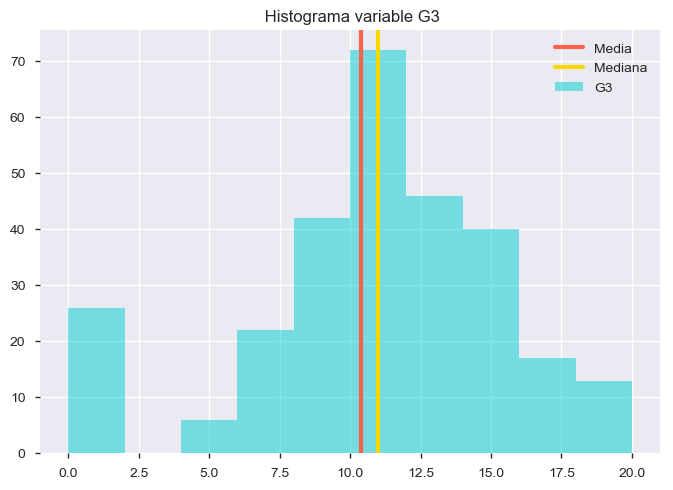

In [29]:
plot_hist(df,'G3')

Los histogramas de las variables objetivo muestran que los datos tienen una tendencia a distribución normal.

In [30]:
# ScatterPlot
def grouped_scatterplot(dataframe, var_x, var_y, group_by):
    """funcion para graficar scatterplot con variables agrupadas"""
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    g = sns.FacetGrid(tmp, col=group_by, height=4, aspect=.5)
    g.map(sns.scatterplot, var_x, var_y)

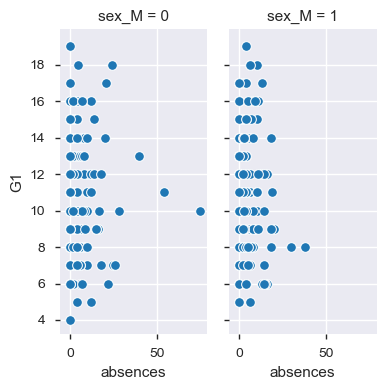

In [31]:
grouped_scatterplot(df, 'absences', 'G1', 'sex_M')

Se utiliza la funcion de scatterplot agrupado para ver las notas de acuerdo a las ausencias y separadas por el sexo del alumno, en este gráfico no se observan diferencias por el género de los alumnos y además se puede ver la tendencia que a un menor numero de ausencias las notas tienden a ser mayores.

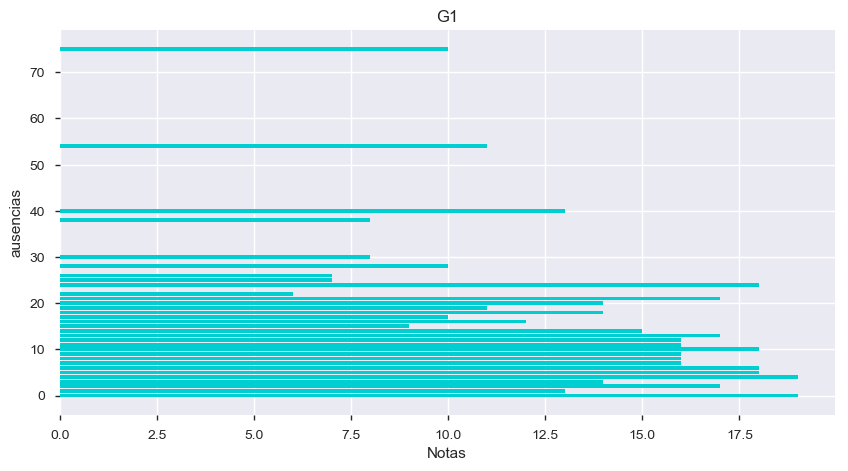

In [32]:
#GRAFICO DE BARRAS
plt.figure(figsize=(10,5))
plt.barh(df['absences'], df['G1'],color='darkturquoise')
plt.xlabel('Notas')
plt.ylabel('ausencias')
plt.title('G1')
plt.show()

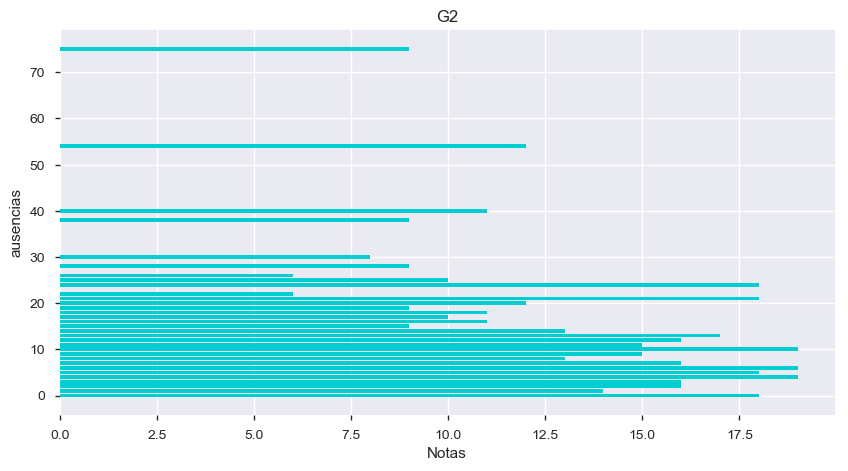

In [33]:
#GRAFICO DE BARRAS
plt.figure(figsize=(10,5))
plt.barh(df['absences'], df['G2'],color='darkturquoise')
plt.xlabel('Notas')
plt.ylabel('ausencias')
plt.title('G2')
plt.show()

Se utiliza un grafico de barras para ver la distribución de notas de acuerdo al nivel de ausencias. En el grafico para G1 y G2 se observa que a menor nivel de ausencias se incrementa el valor de las notas:

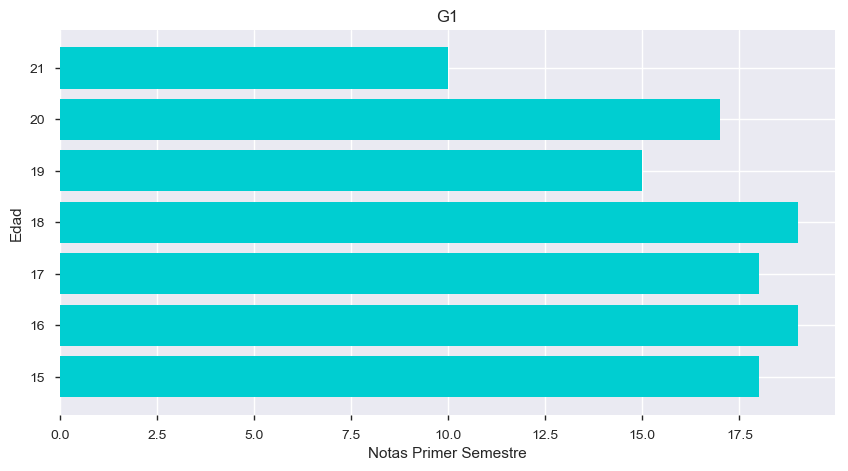

In [34]:
#GRAFICO DE BARRAS
plt.figure(figsize=(10,5))
plt.barh(df['age'], df['G1'],color='darkturquoise')
plt.xlabel('Notas Primer Semestre')
plt.ylabel('Edad')
plt.title('G1')
plt.show()

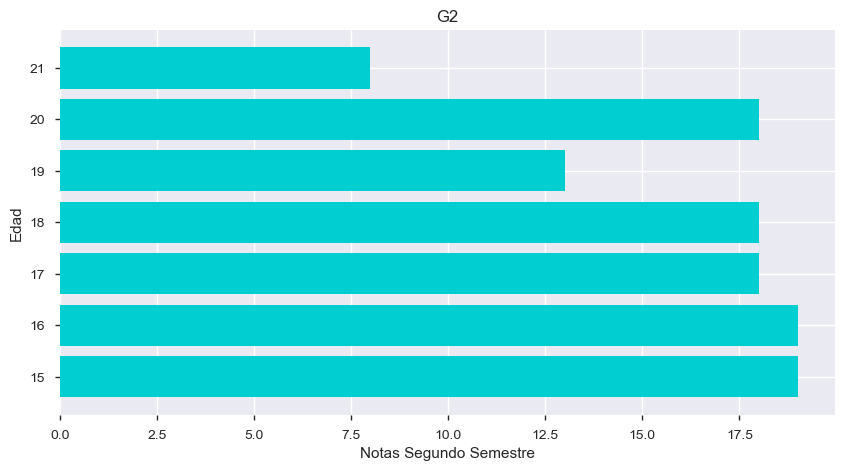

In [35]:
#GRAFICO DE BARRAS
plt.figure(figsize=(10,5))
plt.barh(df['age'], df['G2'],color='darkturquoise')
plt.xlabel('Notas Segundo Semestre')
plt.ylabel('Edad')
plt.title('G2')
plt.show()

Se aplica un grafico de dispersión para ver la relación entre las notas del primer semestre versus las notas del segundo semestre. Se observa una tendencia directamente proporcional entre estas notas, es decir, a mayor nota el primer semestre mayor sera la notatambién en el segunde semestre. Esta tendencia es igual de acuerdo al género del alumno.

### Correlaciones \ Heatmap

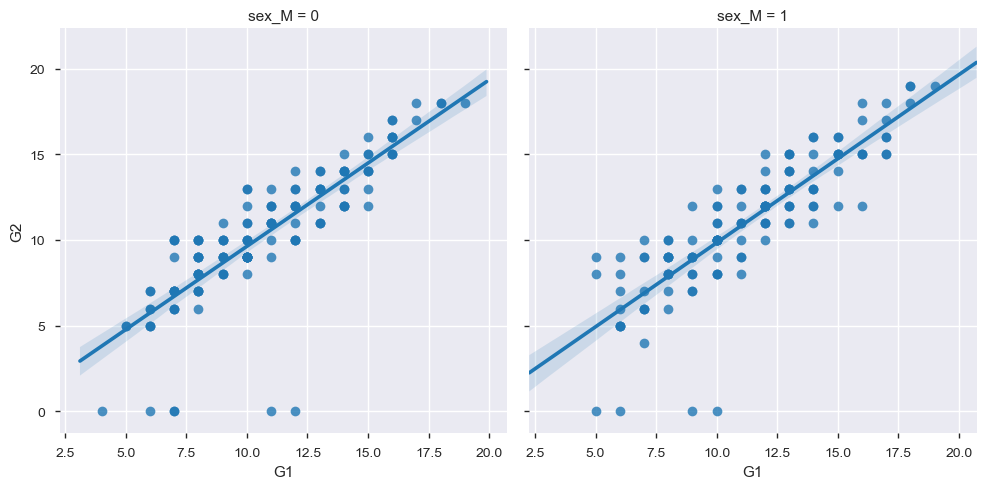

In [36]:
#CORRELACION
sns.lmplot('G1', 'G2', df, col='sex_M')
plt.show()

Se aplica un grafico de dispersión para ver la relación entre las notas del primer semestre versus las notas del segundo semestre. Se observa una tendencia directamente proporcional entre estas notas, es decir, a mayor nota el primer semestre mayor sera la nota también en el segunde semestre. Esta tendencia es igual de acuerdo al género del alumno.

In [37]:
#MATRIZ DE CORRELACIONES
df.corr().style.background_gradient(cmap = 'Greens') 

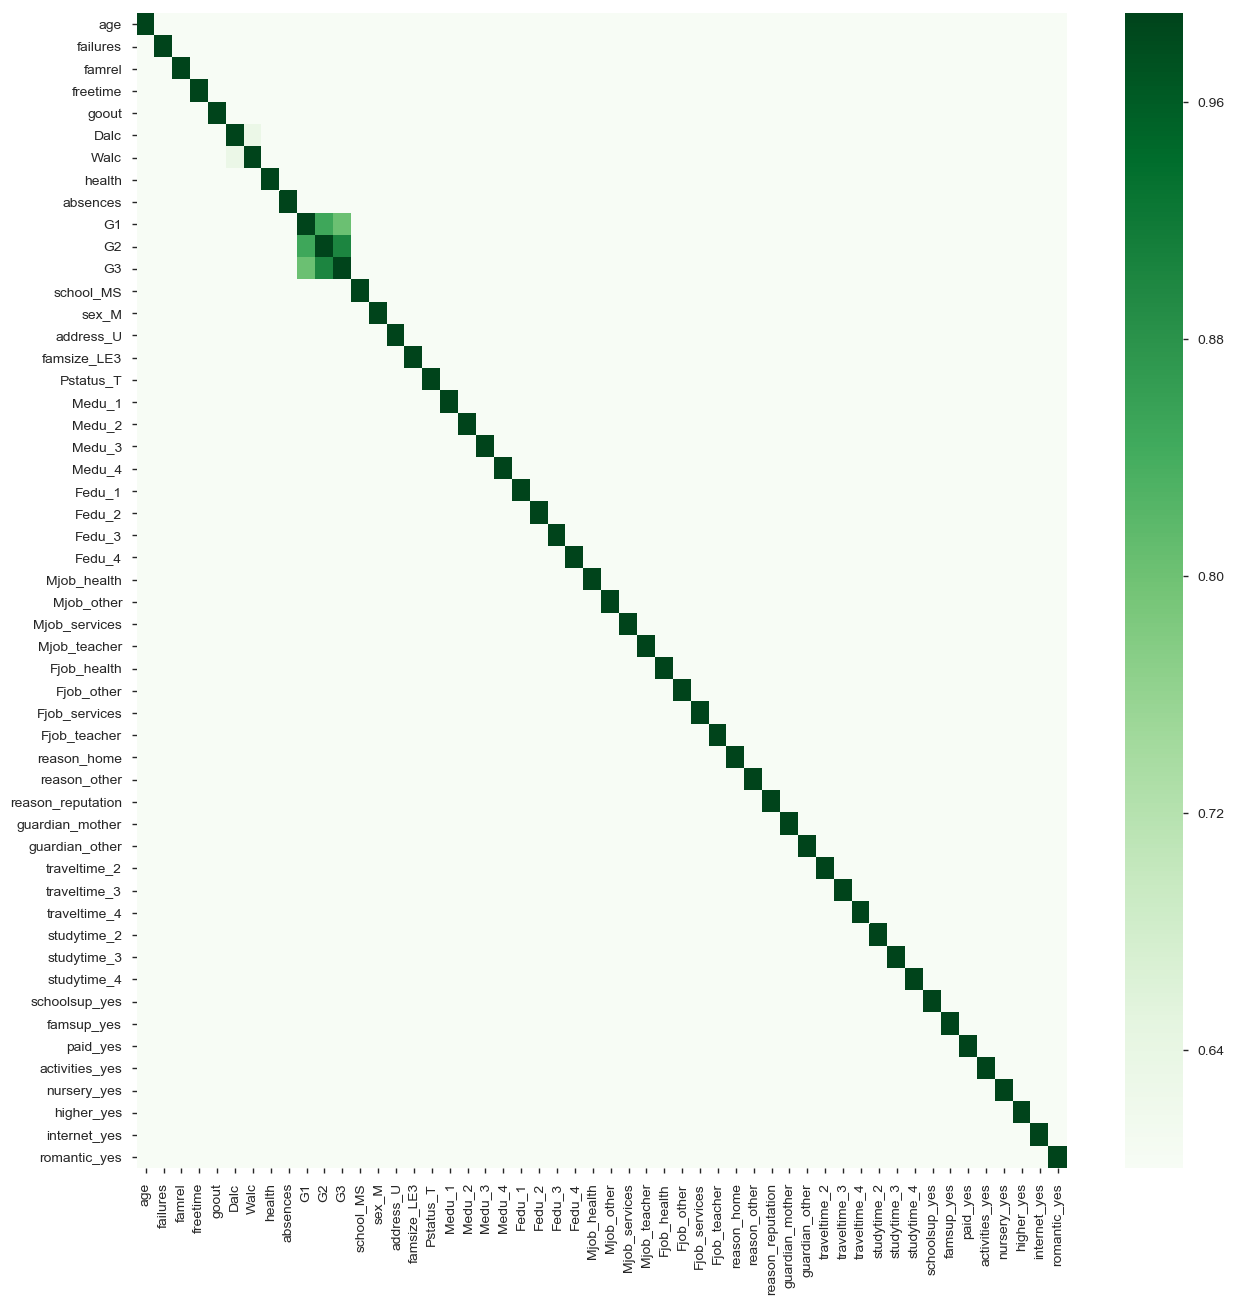

In [38]:
# mapa de calor de las correlaciones mayores a 0.6
plt.figure(figsize=(15,15)) 
sns.heatmap(df.corr(), cmap='Greens',vmin=0.6, vmax=0.99, annot=False) 

In [39]:
# Visualización de correlaciones variables objetivos
df.corr()[['G1']].sort_values(by = 'G1',ascending = False)\
.style.background_gradient(cmap = 'Greens')

,G1
G1,1
G2,0.848606
G3,0.803384
Medu_4,0.213303
Fjob_teacher,0.165586
Fedu_4,0.162213
higher_yes,0.153411
studytime_3,0.138053
Mjob_health,0.110589
reason_reputation,0.0920356


In [40]:
df.corr()[['G2']].sort_values(by = 'G2',ascending = False)\
.style.background_gradient(cmap = 'Greens')

,G2
G2,1
G3,0.902984
G1,0.848606
Medu_4,0.204034
address_U,0.153058
higher_yes,0.152379
Mjob_health,0.126979
sex_M,0.097253
studytime_4,0.0962142
internet_yes,0.0954882


In [41]:
df.corr()[['G3']].sort_values(by = 'G3',ascending = False)\
.style.background_gradient(cmap = 'Greens')

,G3
G3,1
G2,0.902984
G1,0.803384
Medu_4,0.185829
higher_yes,0.162044
address_U,0.119397
reason_reputation,0.105372
sex_M,0.101995
Mjob_health,0.098437
studytime_3,0.0923568


A pesar de la gran cantidad de variables continuas, no se aprecian correlaciones significativas entre ellas, es decir r> 0.5, sin embargo entre las variables objetivos (G1,G2 y G3) se aprecian autocorrelaciones, lo cuál es esperable.

                                  ***

### HITO 3 - MODELACION DESCRIPTIVA

#### MODELOS SATURADOS

Se realizará la modelación descriptiva con regresión lineal del vector objetivo utilizando todas las variables df.columns para obtener todas los nombres disponibles de las variables a usar. Se aplicará sobre los vectores objetivos **G1**, **G2** y **G3**.

In [42]:
df.columns

Index(['age', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'school_MS', 'sex_M',
       'address_U', 'famsize_LE3', 'Pstatus_T', 'Medu_1', 'Medu_2', 'Medu_3',
       'Medu_4', 'Fedu_1', 'Fedu_2', 'Fedu_3', 'Fedu_4', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'traveltime_2', 'traveltime_3', 'traveltime_4',
       'studytime_2', 'studytime_3', 'studytime_4', 'schoolsup_yes',
       'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes',
       'internet_yes', 'romantic_yes'],
      dtype='object')

#### - Modelación saturada G1

In [43]:
model_g1_1 = smf.ols('G1 ~ age + Medu_1+ Medu_2+ Medu_3+ Medu_4 + Fedu_1+ Fedu_2+ Fedu_3+ Fedu_4 + traveltime_2+traveltime_3+traveltime_4 + studytime_2+ studytime_3+ studytime_4 + failures + famrel + freetime + goout + Dalc + Walc+ health + absences + school_MS + sex_M+ address_U+ Mjob_health + Mjob_teacher + Mjob_services + Mjob_other +Fjob_other+ Fjob_health + Fjob_teacher+ Fjob_services + reason_other + reason_reputation + reason_home+ guardian_other+ guardian_mother+ schoolsup_yes + famsup_yes + paid_yes + activities_yes + nursery_yes + higher_yes + internet_yes + romantic_yes', data=df).fit()
model_g1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     2.939
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           4.14e-08
Time:                        14:50:09   Log-Likelihood:                -675.18
No. Observations:                 284   AIC:                             1446.
Df Residuals:                     236   BIC:                             1622.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.2469      5.714      2.318      0.021       1.990      24.504
age                   0.0710      0.182      0.391      0.696      -0.287       0.429
Medu_1               -0.4980      3.123     -0.159      0.873      -6.651       5.655
Medu_2               -0.7631      3.079     -0.248      0.804      -6.829       5.302
Medu_3               -1.1549      3.098     -0.373      0.710      -7.257       4.947
Medu_4                0.0186      3.128      0.006      0.995      -6.143       6.180
Fedu_1               -2.1769      3.049     -0.714      0.476      -8.184       3.830
Fedu_2               -1.3770      3.085     -0.446      0.656      -7.454       4.700
Fedu_3               -1.9666      3.082     -0.638      0.524      -8.039       4.106
Fedu_4               -1.3976      3.127     -0.447      0.655      -7.557       4.762
traveltime_2         -0.4035      0.423     -0.953      0.342      -1.238       0.431
traveltime_3          1.4094      0.812      1.735      0.084      -0.191       3.010
traveltime_4         -1.1896      1.442     -0.825      0.410      -4.030       1.651
studytime_2           0.0284      0.464      0.061      0.951      -0.886       0.943
studytime_3           1.1129      0.628      1.773      0.078      -0.124       2.350
studytime_4           1.7890      0.850      2.106      0.036       0.115       3.463
failures             -1.0668      0.282     -3.785      0.000      -1.622      -0.511
famrel                0.1324      0.215      0.615      0.539      -0.292       0.557
freetime              0.4370      0.192      2.276      0.024       0.059       0.815
goout                -0.7466      0.200     -3.734      0.000      -1.141      -0.353
Dalc                 -0.0894      0.287     -0.312      0.756      -0.654       0.476
Walc                  0.1682      0.212      0.795      0.427      -0.248       0.585
health               -0.3259      0.143     -2.277      0.024      -0.608      -0.044
absences              0.0036      0.024      0.152      0.880      -0.044       0.051
school_MS            -0.3637      0.669     -0.544      0.587      -1.681       0.953
sex_M                 0.7573      0.434      1.746      0.082      -0.097       1.612
address_U             0.1251      0.489      0.256      0.798      -0.838       1.088
Mjob_health           0.9788      0.931      1.052      0.294      -0.854       2.812
Mjob_teacher         -1.1893      0.864     -1.377      0.170      -2.891       0.512
Mjob_services         0.7363      0.671      1.097      0.274      -0.586       2.058
Mjob_other           -0.3584      0.599     -0.599      0.550      -1.538       0.821
Fjob_other           -0.9736      0.988     -0.985      0.325      -2.920       0.973
Fjob_health          -0.5836      1.296     -0.450      0.653      -3.137

#### - Modelación saturada G2

In [44]:
model_g2_1 = smf.ols('G2 ~ age + Medu_1+ Medu_2+ Medu_3+ Medu_4 + Fedu_1+ Fedu_2+ Fedu_3+ Fedu_4 + traveltime_2+traveltime_3+traveltime_4 + studytime_2+ studytime_3+ studytime_4 + failures + famrel + freetime + goout + Dalc + Walc+ health + absences + school_MS + sex_M+ address_U+ Mjob_health + Mjob_teacher + Mjob_services + Mjob_other +Fjob_other+ Fjob_health + Fjob_teacher+ Fjob_services + reason_other + reason_reputation + reason_home+ guardian_other+ guardian_mother+ schoolsup_yes + famsup_yes + paid_yes + activities_yes + nursery_yes + higher_yes + internet_yes + romantic_yes', data=df).fit()

model_g2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     2.547
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           2.15e-06
Time:                        14:50:09   Log-Likelihood:                -722.55
No. Observations:                 284   AIC:                             1541.
Df Residuals:                     236   BIC:                             1716.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.6920      6.751      2.472      0.014       3.392      29.992
age                  -0.0857      0.215     -0.399      0.690      -0.508       0.337
Medu_1               -0.9924      3.690     -0.269      0.788      -8.262       6.277
Medu_2               -1.3191      3.638     -0.363      0.717      -8.485       5.847
Medu_3               -1.5093      3.660     -0.412      0.680      -8.719       5.701
Medu_4               -0.0930      3.695     -0.025      0.980      -7.373       7.187
Fedu_1               -3.7477      3.602     -1.040      0.299     -10.845       3.349
Fedu_2               -3.0397      3.644     -0.834      0.405     -10.220       4.140
Fedu_3               -4.1221      3.642     -1.132      0.259     -11.297       3.053
Fedu_4               -3.6939      3.694     -1.000      0.318     -10.972       3.584
traveltime_2         -0.4529      0.500     -0.905      0.366      -1.439       0.533
traveltime_3          1.1225      0.960      1.169      0.243      -0.768       3.013
traveltime_4         -2.4511      1.703     -1.439      0.151      -5.807       0.904
studytime_2          -0.0428      0.549     -0.078      0.938      -1.123       1.038
studytime_3           0.8470      0.742      1.142      0.255      -0.614       2.308
studytime_4           1.6980      1.004      1.692      0.092      -0.280       3.676
failures             -1.0880      0.333     -3.267      0.001      -1.744      -0.432
famrel                0.0477      0.254      0.187      0.851      -0.454       0.549
freetime              0.3880      0.227      1.710      0.088      -0.059       0.835
goout                -0.9418      0.236     -3.986      0.000      -1.407      -0.476
Dalc                 -0.2037      0.339     -0.601      0.548      -0.871       0.464
Walc                  0.3937      0.250      1.575      0.117      -0.099       0.886
health               -0.4272      0.169     -2.527      0.012      -0.760      -0.094
absences              0.0021      0.028      0.074      0.941      -0.054       0.058
school_MS             0.2252      0.790      0.285      0.776      -1.331       1.781
sex_M                 0.8540      0.512      1.667      0.097      -0.155       1.863
address_U             0.8867      0.578      1.535      0.126      -0.251       2.025
Mjob_health           1.2560      1.099      1.142      0.254      -0.910       3.422
Mjob_teacher         -1.0552      1.021     -1.034      0.302      -3.066       0.955
Mjob_services         0.9216      0.793      1.162      0.246      -0.641       2.484
Mjob_other            0.1685      0.707      0.238      0.812      -1.225       1.562
Fjob_other           -0.1716      1.167     -0.147      0.883      -2.471       2.128
Fjob_health           0.1483      1.531      0.097      0.923      -2.868

#### - Modelación saturada G3

In [45]:
model_g3_1 = smf.ols('G3 ~ age + Medu_1+ Medu_2+ Medu_3+ Medu_4 + Fedu_1+ Fedu_2+ Fedu_3+ Fedu_4 + traveltime_2+traveltime_3+traveltime_4 + studytime_2+ studytime_3+ studytime_4 + failures + famrel + freetime + goout + Dalc + Walc+ health + absences + school_MS + sex_M+ address_U+ Mjob_health + Mjob_teacher + Mjob_services + Mjob_other +Fjob_other+ Fjob_health + Fjob_teacher+ Fjob_services + reason_other + reason_reputation + reason_home+ guardian_other+ guardian_mother+ schoolsup_yes + famsup_yes + paid_yes + activities_yes + nursery_yes + higher_yes + internet_yes + romantic_yes', data=df).fit()
model_g3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     2.541
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           2.27e-06
Time:                        14:50:09   Log-Likelihood:                -775.61
No. Observations:                 284   AIC:                             1647.
Df Residuals:                     236   BIC:                             1822.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            17.1758      8.138      2.111      0.036       1.144      33.208
age                  -0.2045      0.259     -0.790      0.430      -0.714       0.305
Medu_1               -0.1009      4.448     -0.023      0.982      -8.864       8.662
Medu_2               -0.6342      4.385     -0.145      0.885      -9.273       8.004
Medu_3               -0.2584      4.412     -0.059      0.953      -8.949       8.433
Medu_4                1.1954      4.455      0.268      0.789      -7.580       9.971
Fedu_1               -4.7233      4.342     -1.088      0.278     -13.278       3.832
Fedu_2               -4.7819      4.393     -1.088      0.277     -13.437       3.873
Fedu_3               -5.4269      4.390     -1.236      0.218     -14.076       3.222
Fedu_4               -5.4883      4.453     -1.232      0.219     -14.261       3.284
traveltime_2         -0.7172      0.603     -1.189      0.236      -1.905       0.471
traveltime_3          1.3470      1.157      1.164      0.246      -0.932       3.626
traveltime_4         -1.3018      2.053     -0.634      0.527      -5.347       2.743
studytime_2          -0.2827      0.661     -0.428      0.669      -1.585       1.020
studytime_3           1.0933      0.894      1.223      0.223      -0.668       2.855
studytime_4           1.1254      1.210      0.930      0.353      -1.258       3.509
failures             -1.4747      0.401     -3.673      0.000      -2.266      -0.684
famrel                0.4204      0.307      1.371      0.172      -0.184       1.025
freetime              0.5234      0.273      1.914      0.057      -0.015       1.062
goout                -1.1501      0.285     -4.038      0.000      -1.711      -0.589
Dalc                 -0.5353      0.408     -1.311      0.191      -1.340       0.269
Walc                  0.7090      0.301      2.354      0.019       0.116       1.302
health               -0.4360      0.204     -2.139      0.033      -0.838      -0.035
absences              0.0494      0.034      1.443      0.150      -0.018       0.117
school_MS             0.9461      0.952      0.994      0.321      -0.930       2.822
sex_M                 1.0511      0.618      1.702      0.090      -0.166       2.268
address_U             0.9902      0.696      1.422      0.156      -0.382       2.362
Mjob_health           1.4267      1.325      1.077      0.283      -1.184       4.038
Mjob_teacher         -1.1650      1.230     -0.947      0.345      -3.589       1.259
Mjob_services         1.1900      0.956      1.245      0.214      -0.693       3.073
Mjob_other            0.5505      0.853      0.646      0.519      -1.129       2.230
Fjob_other           -0.8086      1.407     -0.575      0.566      -3.581       1.963
Fjob_health          -0.0567      1.846     -0.031      0.976      -3.693

#### MODELOS DEPURADOS

#### - Modelación depurada G1

In [46]:
pvalues = model_g1_1.pvalues
print ('Las siguientes variables son estadísticamente significativas: ')        
means_values= pd.Series(pvalues).where(lambda x : x<0.025).dropna() 
print(means_values)

Las siguientes variables son estadísticamente significativas: 
Intercept        0.021286
failures         0.000195
freetime         0.023734
goout            0.000237
health           0.023664
schoolsup_yes    0.003716
famsup_yes       0.006109
dtype: float64


In [47]:
model_g1_2 = smf.ols('G1 ~ failures + goout +health+ freetime + schoolsup_yes + famsup_yes', data=df).fit()
model_g1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     12.40
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           2.25e-12
Time:                        14:50:10   Log-Likelihood:                -706.83
No. Observations:                 284   AIC:                             1428.
Df Residuals:                     277   BIC:                             1453.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.9418      0.851     16.387      0.000      12.267      15.617
failures         -1.3148      0.245     -5.374      0.000      -1.796      -0.833
goout            -0.6548      0.170     -3.842      0.000      -0.990      -0.319
health           -0.2701      0.134     -2.015      0.045      -0.534      -0.006
freetime          0.3285      0.178      1.845      0.066      -0.022       0.679
schoolsup_yes    -1.9357      0.521     -3.716      0.000      -2.961      -0.910
famsup_yes       -0.5839      0.364     -1.603      0.110      -1.301       0.133
==============================================================================
Omnibus:                        6.853   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.626
Skew:                           0.162   Prob(JB):                       0.0990
Kurtosis:                       2.466   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### - Modelación depurada G2

In [48]:
pvalues = model_g2_1.pvalues
print ('Las siguientes variables son estadísticamente significativas: ')        
means_values= pd.Series(pvalues).where(lambda x : x<0.025).dropna() 
print(means_values)

Las siguientes variables son estadísticamente significativas: 
Intercept     0.014123
failures      0.001250
goout         0.000090
health        0.012166
famsup_yes    0.015496
dtype: float64


In [49]:
model_g2_2 = smf.ols('G2 ~ failures + goout + health + famsup_yes', data=df).fit()
model_g2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     13.34
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           5.80e-10
Time:                        14:50:10   Log-Likelihood:                -755.95
No. Observations:                 284   AIC:                             1522.
Df Residuals:                     279   BIC:                             1540.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8484      0.885     16.770      0.000      13.105      16.591
failures      -1.4703      0.290     -5.075      0.000      -2.041      -0.900
goout         -0.6521      0.196     -3.330      0.001      -1.038      -0.267
health        -0.3533      0.158     -2.231      0.026      -0.665      -0.042
famsup_yes    -0.6903      0.427     -1.618      0.107      -1.530       0.149
==============================================================================
Omnibus:                       13.249   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.707
Skew:                          -0.446   Prob(JB):                     0.000640
Kurtosis:                       3.669   Cond. No.                         22.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### - Modelación depurada G3

In [50]:
pvalues = model_g3_1.pvalues
print ('Las siguientes variables son estadísticamente significativas: ')        
means_values= pd.Series(pvalues).where(lambda x : x<0.025).dropna() 
print(means_values)

Las siguientes variables son estadísticamente significativas: 
failures    0.000296
goout       0.000073
Walc        0.019412
dtype: float64


In [51]:
model_g3_1 = smf.ols('G3 ~ failures + goout+ Walc', data=df).fit()
model_g3_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     17.52
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           1.89e-10
Time:                        14:50:10   Log-Likelihood:                -809.34
No. Observations:                 284   AIC:                             1627.
Df Residuals:                     280   BIC:                             1641.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0309      0.770     16.922      0.000      11.515      14.547
failures      -2.0436      0.349     -5.859      0.000      -2.730      -1.357
goout         -0.9345      0.262     -3.562      0.000      -1.451      -0.418
Walc           0.4150      0.219      1.892      0.059      -0.017       0.847
==============================================================================
Omnibus:                       17.129   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.559
Skew:                          -0.577   Prob(JB):                     9.33e-05
Kurtosis:                       3.488   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observaciones generales de los modelos:

- Los 3 modelos propuestos son estadísticamente significativos de acuerdo a sus valores f<0.05

- Los coeficientes varían bastante y los modelos se construyen con una gran cantidad de variables, casí 50, tras la depuración, disminuyen a menos de 5 variables, lo cuál reduce el promedio de error cuadrático, pero asimismo disminuye el poder explicativo o r2 ajustado.

- En promedio los 3 modelos para predecir g1, g2 y g3 presentan un r2 ajustado cercano a 0.15

                                ***

## Hito 4: Modelación predictiva

### Segmentacion de datos

In [52]:
# se consideran las variables significativas del modelo depurado
X = df[['failures', 'goout', 'Walc']].copy() 
y = df['G3'].copy()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17955)

### Modelo 1 normalizado con intercepto

In [61]:
# Función para generar reportes

def report_scores(yhat, y_test):
    """
    Definición: Función que genere reportes de un modelo sobre un conjunto de datos predichos y de datos por validar
    Input: 2 vectores que contienen los datos predichos y los datos por validar
    Outpout: la función imprime el Error Cuadrático Promedio y R2.
    """
    m2_mse = mean_squared_error(y_test, yhat).round(0)
    m2_r2 = r2_score(y_test, yhat).round(2)
    print('Error Cuadrático Medio Promedio:', m2_mse)
    print('R2:', m2_r2)

In [62]:
depure_model_norm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
depure_model_norm.fit(X_train, y_train)
depure_model_yhat_norm = depure_model_norm.predict(X_test)

In [63]:
report_scores(depure_model_yhat_norm, y_test)

Error Cuadrático Medio Promedio: 18.0
R2: 0.16


### Modelo 2 normalizado sin intercepto

In [64]:
depure2_model_norm = linear_model.LinearRegression(fit_intercept=True, normalize=False)
depure2_model_norm.fit(X_train, y_train)
depure2_model_yhat_norm = depure2_model_norm.predict(X_test)

In [65]:
report_scores(depure2_model_yhat_norm, y_test)

Error Cuadrático Medio Promedio: 18.0
R2: 0.16


###   Modelo 3 no normalizado con intercepto

In [66]:
depure3_model_norm = linear_model.LinearRegression(fit_intercept=False, normalize=False)
depure3_model_norm.fit(X_train, y_train)
depure3_model_yhat_norm = depure3_model_norm.predict(X_test)

In [67]:
report_scores(depure3_model_yhat_norm, y_test)

Error Cuadrático Medio Promedio: 41.0
R2: -0.97


Se observa que los 3 modelos presentan valores bajos de explicación, el r2 del último modelo toma valores negativos (y cambiantes) ya que la matriz de atributos es singular y por lo tanto el modelo no puede ajustarse.

El mejor modelo para predecir las notas de G3,es el modelo 3 ya que tiene un mejor rendimiento a los modelos anteriorese debido a que el r2 es 0.97 es decir explica el 97% de la varianza, en cambio los otros modelos solamente explican un 0.16%. Si bien el error medio se dulplica aun sigue siendo bajo (41).

                                                        ***